# Recurrent Neural Network

## Long String Prediction

In [24]:
import tensorflow as tf
import tensorflow.keras as k
import numpy as np
import matplotlib.pyplot as plt

In [27]:
sentence = ("You knew that I was no good for you "
           "when we lay down after doing that things you loved "
           "you knew that I wasn’t better than you "
           "I hope that I could be seemed really fine with you leaving").lower()
idx2word = list(set(sentence))
word2idx = {w: i for i, w in enumerate(idx2word)}
num_classes = len(idx2word)

In [44]:
seq_len = 10
x_words = [sentence[i:i + seq_len] for i, _ in list(enumerate(sentence))[:-10]] # Is this the best way?? 
x_words_idx = [[word2idx[w] for w in seq] for seq in x_words]                   # difficult to predict - tf only recieves square-shaped list
y_words = [sentence[i + 1 : i + seq_len + 1] for i, _ in list(enumerate(sentence))[:-10]]
y_words_idx = [[word2idx[w] for w in seq] for seq in x_words]

x = tf.one_hot(x_words_idx, num_classes)
y = tf.one_hot(y_words_idx, num_classes)
x.shape, y.shape

(TensorShape([174, 10, 24]), TensorShape([174, 10, 24]))

In [66]:
# Alternative way - just create, then pick

source = [sentence[i : i+seq_len] for i, _ in enumerate(sentence)]
x_alt, y_alt = source[:-10], source[1:-9]

[x_alt[i] for i in [0,-1]], [y_alt[i] for i in [0,-1]]

ou leaving


(['you knew t', 'you leavin'], ['ou knew th', 'ou leaving'])

In [47]:
model = k.Sequential()
model.add(k.layers.LSTM(units = num_classes, input_shape = (seq_len, num_classes), return_sequences = True))
model.add(k.layers.LSTM(units = num_classes, return_sequences = True))
model.add(k.layers.TimeDistributed(k.layers.Dense(units = num_classes, activation = 'softmax')))

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = k.optimizers.Adam(lr = 0.1), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 24)            4704      
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 24)            4704      
_________________________________________________________________
time_distributed (TimeDistri (None, 10, 24)            600       
Total params: 10,008
Trainable params: 10,008
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(x, y, batch_size = len(x), epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 3.1771 - acc: 0.0718
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9416 - acc: 0.2126
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 3.1350 - acc: 0.2126
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 2.8152 - acc: 0.2224
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 2.8063 - acc: 0.1563
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 2.8011 - acc: 0.1379
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 2.7715 - acc: 0.1966
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 2.7070 - acc: 0.3253
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 2.6066 - acc: 0.3437
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 2.4782 - acc: 0.3017
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 2.3192 

In [56]:
prediction = tf.argmax(model.predict(x), axis = -1)
prediction.shape

TensorShape([174, 10])

In [59]:
prediction_word = [''.join([idx2word[i] for i in seq]) for seq in prediction]
print('Result : ')
print(prediction_word[0] + ''.join([seq[-1] for seq in prediction_word[1:]]))

Result : 
you knew that i was no good for you when we lay down after doing that things you loved you knew that i wasn’t better than you i hope that i could be seemed really fine with you leavin


## Stock Market Prediction

In [60]:
data = np.loadtxt('stock.csv', delimiter = ',')[::-1]
print(data.shape)
print(data[:2])

(732, 5)
[[  568.00257    568.00257    552.922516 13100.         558.462551]
 [  561.202549   566.43259    558.672539 41200.         559.992565]]


Text(0.5, 1.0, 'Low-Volume')

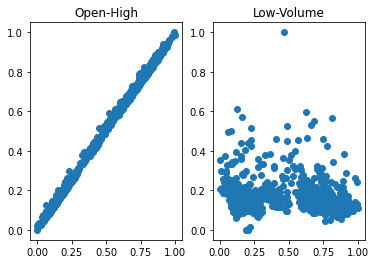

In [61]:
data_scaled = ( data - np.min(data, axis = 0) ) / ( np.max(data, axis = 0) - np.min(data, axis = 0) + 1e-7 )

plt.figure()
plt.subplot(1,2,1)
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.title('Open-High')
plt.subplot(1,2,2)
plt.scatter(data_scaled[:,2], data_scaled[:,3])
plt.title('Low-Volume') # How to deal widh outlier?

In [62]:
seq_len = 10
train_length = int(len(data_scaled) * 0.7)
data_train = data_scaled[ : train_length]
data_test = data_scaled[train_length-seq_len : ]

def get_array(data, length) :
    _x = [data[i : i+length] for i, _ in enumerate(data)][:-length]
    _y = data[length : length+len(_x), 4]
    return np.array(_x), np.array(_y)

x, y = get_array(data_train, seq_len)
x_t, y_t = get_array(data_test, seq_len)

print(x.shape, y.shape)
print(x[1], y[0])

(502, 10, 5) (502,)
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]
 [1.34312008e-01 1.51758773e-01 1.16172520e-01 3.93806579e-01
  1.32899618e-01]
 [1.39732317e-01 1.70604289e-01 1.58603816e-01 2.81733441e-01
  1.81716793e-01]
 [1.89330688e-01 2.00577988e-01 1.91879834e-01 2.97830958e-01
  2.08646505e-01]
 [2.05008754e-01 1.99508618e-01 1.53585995e-01 3.61109617e-01
  1.41060015e-01]] 0.14106001462254325


In [63]:
stock_model = k.Sequential()
stock_model.add(k.layers.LSTM(units = 1, input_shape = (10, 5)))
stock_model.add(k.layers.Dense(units = 1, activation = 'tanh'))
stock_model.compile(loss = 'MSE', optimizer = k.optimizers.Adam(0.01), metrics = ['acc'])
stock_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 28        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [66]:
stock_model.fit(x, y, epochs = 500)

Epoch 1/500
16/16 [==============================] - 1s 44ms/step - loss: 8.5101e-04 - acc: 0.0020
Epoch 2/500
16/16 [==============================] - 1s 43ms/step - loss: 8.4817e-04 - acc: 0.0020
Epoch 3/500
16/16 [==============================] - 1s 44ms/step - loss: 8.5254e-04 - acc: 0.0020
Epoch 4/500
16/16 [==============================] - 1s 44ms/step - loss: 8.2720e-04 - acc: 0.0020ETA: 0s - loss: 8.5096e-04 - acc: 0.00
Epoch 5/500
16/16 [==============================] - 1s 43ms/step - loss: 8.2706e-04 - acc: 0.0020
Epoch 6/500
16/16 [==============================] - 1s 38ms/step - loss: 9.1367e-04 - acc: 0.0020
Epoch 7/500
16/16 [==============================] - 1s 38ms/step - loss: 9.2638e-04 - acc: 0.0020
Epoch 8/500
16/16 [==============================] - 1s 44ms/step - loss: 8.7465e-04 - acc: 0.0020
Epoch 9/500
16/16 [==============================] - 1s 44ms/step - loss: 9.4707e-04 - acc: 0.0020
Epoch 10/500
16/16 [==============================] - 1s 44ms/step - lo

16/16 [==============================] - 1s 38ms/step - loss: 8.2745e-04 - acc: 0.0020
Epoch 83/500
16/16 [==============================] - 1s 38ms/step - loss: 8.7081e-04 - acc: 0.0020
Epoch 84/500
16/16 [==============================] - 1s 44ms/step - loss: 8.2143e-04 - acc: 0.0020
Epoch 85/500
16/16 [==============================] - 1s 44ms/step - loss: 8.2863e-04 - acc: 0.0020
Epoch 86/500
16/16 [==============================] - 1s 38ms/step - loss: 8.2138e-04 - acc: 0.0020
Epoch 87/500
16/16 [==============================] - 1s 44ms/step - loss: 8.3707e-04 - acc: 0.0020
Epoch 88/500
16/16 [==============================] - 1s 43ms/step - loss: 8.2751e-04 - acc: 0.0020
Epoch 89/500
16/16 [==============================] - 1s 38ms/step - loss: 8.3526e-04 - acc: 0.0020
Epoch 90/500
16/16 [==============================] - 1s 38ms/step - loss: 8.0963e-04 - acc: 0.0020
Epoch 91/500
16/16 [==============================] - 1s 38ms/step - loss: 8.2733e-04 - acc: 0.0020
Epoch 92/500


16/16 [==============================] - 1s 44ms/step - loss: 8.3437e-04 - acc: 0.0020
Epoch 163/500
16/16 [==============================] - 1s 44ms/step - loss: 8.1406e-04 - acc: 0.0020
Epoch 164/500
16/16 [==============================] - 1s 38ms/step - loss: 8.3439e-04 - acc: 0.0020
Epoch 165/500
16/16 [==============================] - 1s 43ms/step - loss: 8.0729e-04 - acc: 0.0020
Epoch 166/500
16/16 [==============================] - 1s 44ms/step - loss: 9.5055e-04 - acc: 0.0020
Epoch 167/500
16/16 [==============================] - 1s 38ms/step - loss: 9.9126e-04 - acc: 0.0020
Epoch 168/500
16/16 [==============================] - 1s 38ms/step - loss: 9.8476e-04 - acc: 0.0020
Epoch 169/500
16/16 [==============================] - 1s 38ms/step - loss: 9.1071e-04 - acc: 0.0020
Epoch 170/500
16/16 [==============================] - 1s 43ms/step - loss: 8.7169e-04 - acc: 0.0020
Epoch 171/500
16/16 [==============================] - 1s 38ms/step - loss: 8.2456e-04 - acc: 0.0020
Epoc

16/16 [==============================] - 1s 43ms/step - loss: 8.1236e-04 - acc: 0.0020
Epoch 244/500
16/16 [==============================] - 1s 38ms/step - loss: 8.2570e-04 - acc: 0.0020
Epoch 245/500
16/16 [==============================] - 1s 38ms/step - loss: 7.8052e-04 - acc: 0.0020
Epoch 246/500
16/16 [==============================] - 1s 44ms/step - loss: 8.3276e-04 - acc: 0.0020
Epoch 247/500
16/16 [==============================] - 1s 38ms/step - loss: 8.0815e-04 - acc: 0.0020
Epoch 248/500
16/16 [==============================] - 1s 44ms/step - loss: 8.2090e-04 - acc: 0.0020
Epoch 249/500
16/16 [==============================] - 1s 49ms/step - loss: 8.2089e-04 - acc: 0.0020
Epoch 250/500
16/16 [==============================] - 1s 49ms/step - loss: 8.3526e-04 - acc: 0.0020
Epoch 251/500
16/16 [==============================] - 1s 43ms/step - loss: 8.4441e-04 - acc: 0.0020 ETA: 0s - loss: 6.5886e-04 - acc: 0.00
Epoch 252/500
16/16 [==============================] - 1s 44ms/ste

16/16 [==============================] - 1s 38ms/step - loss: 8.4588e-04 - acc: 0.0020
Epoch 324/500
16/16 [==============================] - 1s 44ms/step - loss: 8.5062e-04 - acc: 0.0020
Epoch 325/500
16/16 [==============================] - 1s 43ms/step - loss: 8.0885e-04 - acc: 0.0020
Epoch 326/500
16/16 [==============================] - 1s 44ms/step - loss: 8.2057e-04 - acc: 0.0020
Epoch 327/500
16/16 [==============================] - 1s 38ms/step - loss: 7.9678e-04 - acc: 0.0020
Epoch 328/500
16/16 [==============================] - 1s 38ms/step - loss: 8.3666e-04 - acc: 0.0020
Epoch 329/500
16/16 [==============================] - 1s 38ms/step - loss: 8.1923e-04 - acc: 0.0020
Epoch 330/500
16/16 [==============================] - 1s 38ms/step - loss: 8.0278e-04 - acc: 0.0020
Epoch 331/500
16/16 [==============================] - 1s 38ms/step - loss: 8.3114e-04 - acc: 0.0020
Epoch 332/500
16/16 [==============================] - 1s 43ms/step - loss: 8.1438e-04 - acc: 0.0020
Epoc

16/16 [==============================] - 1s 44ms/step - loss: 7.9080e-04 - acc: 0.0020
Epoch 403/500
16/16 [==============================] - 1s 44ms/step - loss: 7.9522e-04 - acc: 0.0020
Epoch 404/500
16/16 [==============================] - 1s 38ms/step - loss: 7.8706e-04 - acc: 0.0020
Epoch 405/500
16/16 [==============================] - 1s 44ms/step - loss: 7.8625e-04 - acc: 0.0020
Epoch 406/500
16/16 [==============================] - 1s 44ms/step - loss: 8.0182e-04 - acc: 0.0020 ETA: 0s - loss: 8.3648e-04 - acc: 0.0024  
Epoch 407/500
16/16 [==============================] - 1s 44ms/step - loss: 8.1299e-04 - acc: 0.0020
Epoch 408/500
16/16 [==============================] - 1s 44ms/step - loss: 8.0862e-04 - acc: 0.0020
Epoch 409/500
16/16 [==============================] - 1s 44ms/step - loss: 7.8482e-04 - acc: 0.0020
Epoch 410/500
16/16 [==============================] - 1s 44ms/step - loss: 8.4507e-04 - acc: 0.0020: 0s - loss: 8.4062e-04 - acc: 0.002
Epoch 411/500
16/16 [=====

16/16 [==============================] - 1s 43ms/step - loss: 7.9281e-04 - acc: 0.0020
Epoch 482/500
16/16 [==============================] - 1s 43ms/step - loss: 7.9576e-04 - acc: 0.0020
Epoch 483/500
16/16 [==============================] - 1s 43ms/step - loss: 8.1541e-04 - acc: 0.0020
Epoch 484/500
16/16 [==============================] - 1s 44ms/step - loss: 8.7301e-04 - acc: 0.0020
Epoch 485/500
16/16 [==============================] - 1s 44ms/step - loss: 9.7093e-04 - acc: 0.0020
Epoch 486/500
16/16 [==============================] - 1s 38ms/step - loss: 8.3525e-04 - acc: 0.0020
Epoch 487/500
16/16 [==============================] - 1s 38ms/step - loss: 7.8894e-04 - acc: 0.0020
Epoch 488/500
16/16 [==============================] - 1s 43ms/step - loss: 8.3310e-04 - acc: 0.0020
Epoch 489/500
16/16 [==============================] - 1s 43ms/step - loss: 8.0474e-04 - acc: 0.0020
Epoch 490/500
16/16 [==============================] - 1s 38ms/step - loss: 8.1837e-04 - acc: 0.0020
Epoc

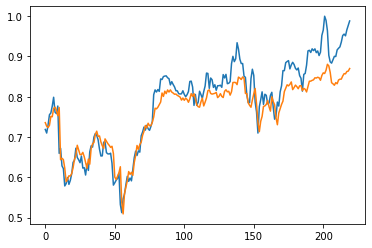

In [67]:
y_prediction = stock_model.predict(x_t)
plt.figure()
plt.plot(y_t)
plt.plot(y_prediction)